In [ ]:
#Import library numpy dan matplotlib
import numpy as np
import matplotlib.pyplot as plt
#Import library tensorflow, keras dan dataset yang akan didownload melalui API google
import tensorflow as tf

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

#Memasukkan dataset train dan dataset test dengan menggunakan library yang sudah disediakan oleh google yaitu mnist

In [ ]:
(X_train , y_train) , (X_test , y_test) = mnist.load_data()
X_train.shape , y_train.shape , X_test.shape , y_test.shape

Dibawah ini adalah pengecekan 10 dari dataset yang telah di download melalui API Google yaitu dataset dari mnist ada 60.000 dataset yang akan di latih dan 10.000 dataset yang akan di uji

In [ ]:
def plot_input_img(i):
    plt.imshow(X_train[i] , cmap = 'binary')
    plt.title(y_train[i])
    plt.show()

C:\Users\devad\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


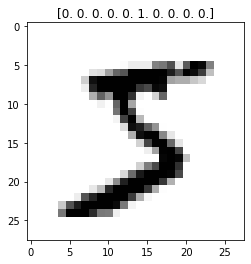

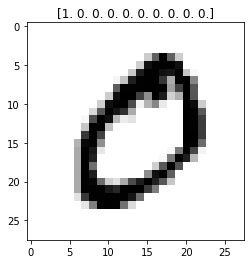

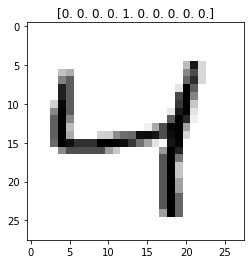

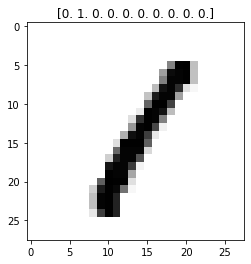

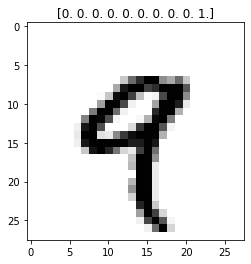

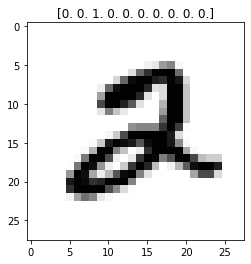

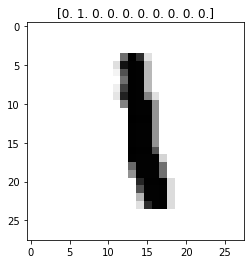

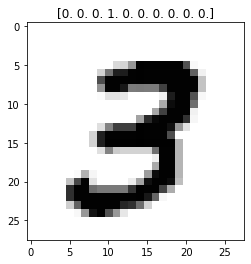

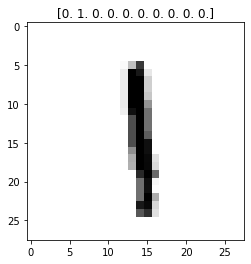

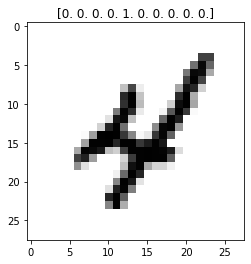

In [20]:
for i in range(10):
    plot_input_img(i)

Tahap selanjutnya melakukan pre-processing gambar

In [8]:
#Melakukan normalisasi gambar menjadi [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Melakukan reshaping gambar/memperbesar dimensi gambar menjadi (28,28,1)
X_train = np.expand_dims(X_train , -1)
X_test = np.expand_dims(X_test , -1)

#Mengkonversi classes menjadi satu hot vektor
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [10]:
model = Sequential()

#Convolution Pertama
model.add(Conv2D(32, (3,3) , input_shape=(28,28,1) , activation = 'relu') )
model.add(MaxPool2D((2,2)))

#Convolution Kedua
model.add(Conv2D(64, (3,3) , activation = 'relu') )
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [12]:
model.compile(optimizer= 'adam', loss = tf.keras.losses.categorical_crossentropy , metrics=['accuracy'])

Selanjutnya Early Stopping dan ModelCheckpoint, Keduanya digunakan untuk berhenti lebih cepat apabila Akurasi Validasi tidak memiliki perkembangan lagi dan untuk mempercepat compile modelnya


In [13]:
# Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01, patience= 4, verbose=1)

# Modelcheckpoint

mc = ModelCheckpoint("./bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)
cb = [es,mc]

Model Training

In [14]:
#Karena dataset yang digunakan sangatlah banyak, maka validation splitnya 30%
history = model.fit(X_train , y_train , epochs = 10, validation_split=0.3 , callbacks= cb)

Epoch 1/10
1313/1313 [==============================] - ETA: 0s - loss: 0.2605 - accuracy: 0.9194
Epoch 00001: val_accuracy improved from -inf to 0.97311, saving model to .\bestmodel.h5
1313/1313 [==============================] - 73s 55ms/step - loss: 0.2605 - accuracy: 0.9194 - val_loss: 0.0853 - val_accuracy: 0.9731
Epoch 2/10
1312/1313 [============================>.] - ETA: 0s - loss: 0.0967 - accuracy: 0.9702 - ETA: 36s - loss: 0.1007 - acc - ETA: 35s - loss: 0.1008 - accuracy: - ETA: 34s - loss: 0.1005 - accura - ETA: 34s - loss: 0.1013 - accuracy: 0 - ETA: 33s - loss:
Epoch 00002: val_accuracy improved from 0.97311 to 0.98100, saving model to .\bestmodel.h5
1313/1313 [==============================] - 96s 73ms/step - loss: 0.0967 - accuracy: 0.9702 - val_loss: 0.0634 - val_accuracy: 0.9810
Epoch 3/10
1312/1313 [============================>.] - ETA: 0s - loss: 0.0722 - accuracy: 0.9774 ETA: 2s - loss: 0.0724  - ETA: 0s - loss: 0.071
Epoch 00003: val_accuracy improved from 0.981